# Лабораторна робота #2
Суміщення зображень на основі використання дескрипторів

### Завдання
Вибрати з інтернету набори зображень з різною контрастністю і різним флуктуаціями освітленості. Для кожного зображення побудувати варіант спотвореного (видозміненого зображення). Для кожної отриманої пари побудувати дескриптор і проаналізувати можливість суміщення цих зображень і з визначення параметрів геметричних перетворень (кут повороту, зміщень в напрямку х і напрямку y).

 A-KAZE

Для перевірки збігів необхідно написати власну функцію матчінгу, а результати її роботи перевірити засобами OpenCV. Якщо повної реалізації дескриптора не має в OpenCV, то такий необхідно створити власну функцію побудови цих дискрипторів. У цьому випадку матчінг можна здійснювати стандартними засобами (якщо це можливо).

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
akaze = cv2.AKAZE_create()

In [102]:
def cv_bf_matcher(image: np.ndarray, image2: np.ndarray) -> np.ndarray:
    n_dots = 25
    kp1, des1 = akaze.detectAndCompute(image, None)
    kp2, des2 = akaze.detectAndCompute(image2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    imgs = cv2.drawMatches(image, kp1, image2, kp2, matches[:n_dots], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return imgs

In [103]:
def custom_matcher(image: np.ndarray, image2: np.ndarray) -> np.ndarray:
    n_dots = 25
    threshold: float = 0.5
    kp1, des1 = akaze.detectAndCompute(image, None)
    kp2, des2 = akaze.detectAndCompute(image2, None)
    matches = []
    for i, d1 in enumerate(des1):
        distances = np.linalg.norm(d1-des2, axis=1)
        min_index = np.argmin(distances)
        min_distances = distances[min_index]
        if min_distances < threshold:
            matches.append(cv2.DMatch(i, min_index, min_distances))

    matches = sorted(matches, key=lambda x: x.distance)
    imgs = cv2.drawMatches(image, kp1, image2, kp2, matches[:n_dots], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return imgs

In [104]:
def show(matches: np.ndarray) -> None:
    plt.figure(figsize=(16, 10))
    plt.imshow(matches)
    plt.axis("off")
    plt.show()

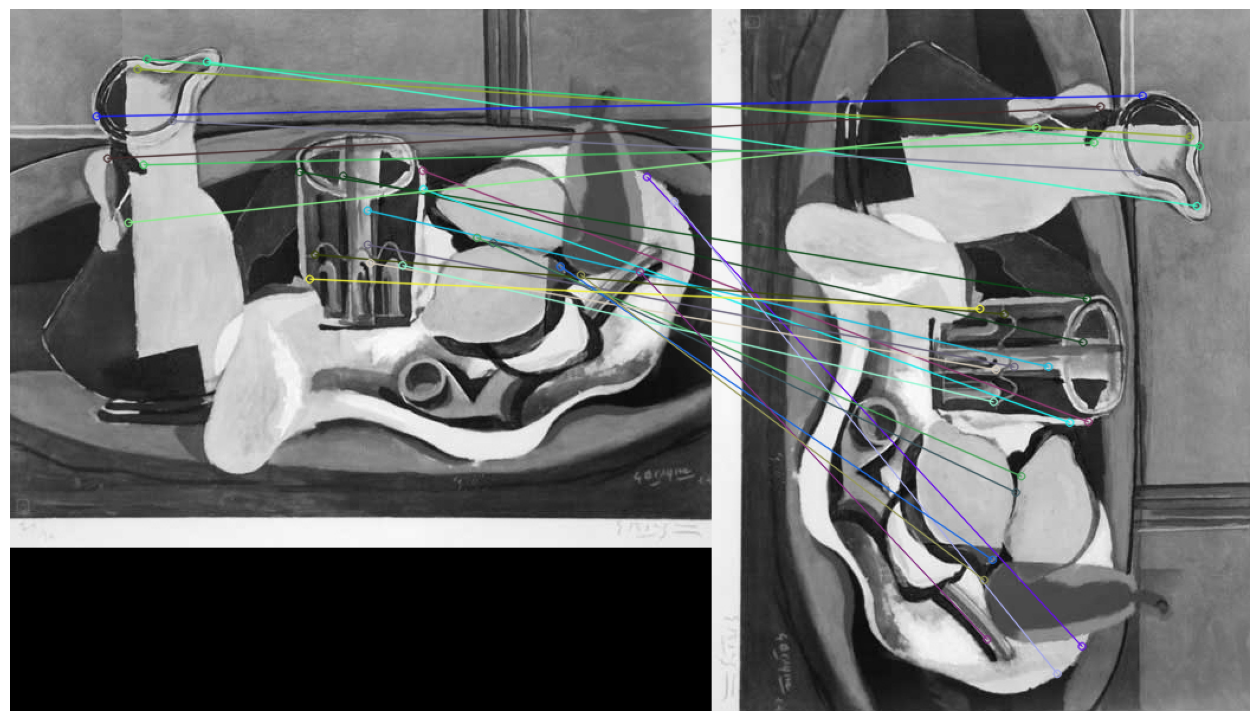

In [105]:
img1 = cv2.imread("./images/high_contrast.jpeg", cv2.IMREAD_GRAYSCALE)
img1_rotate = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)
cv_matches = cv_bf_matcher(img1, img1_rotate)
show(cv_matches)

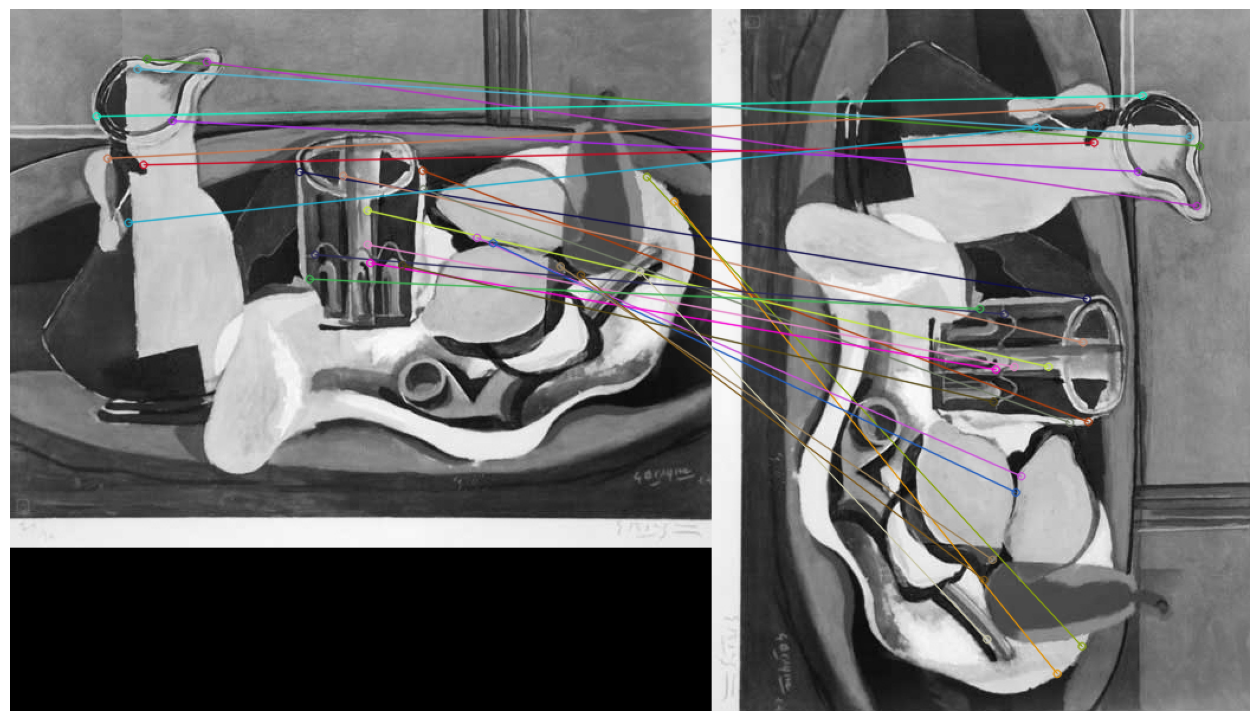

In [106]:
custom = custom_matcher(img1, img1_rotate)
show(custom)

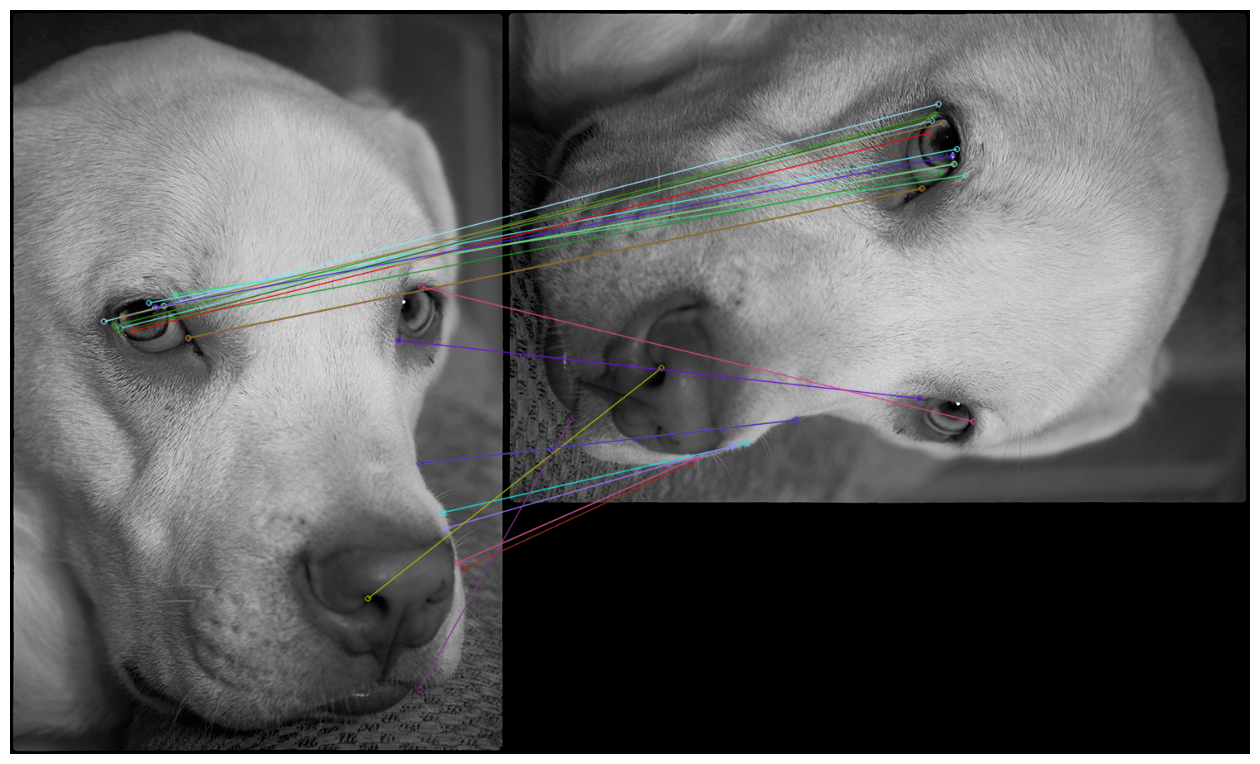

In [107]:
img2 = cv2.imread("./images/low_contrast.jpg", cv2.IMREAD_GRAYSCALE)
img2_rotate = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)

cv_2 = cv_bf_matcher(img2, img2_rotate)
show(cv_2)

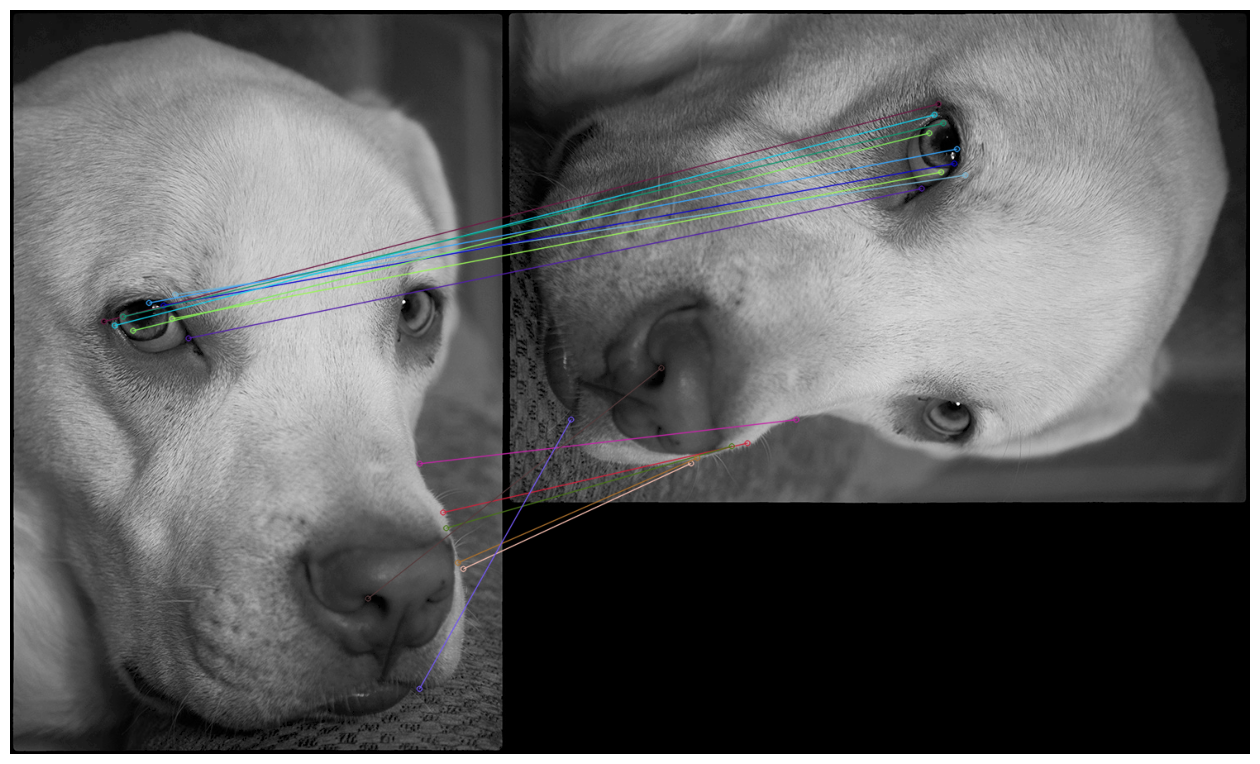

In [108]:
custom_2 = custom_matcher(img2, img2_rotate)
show(custom_2)

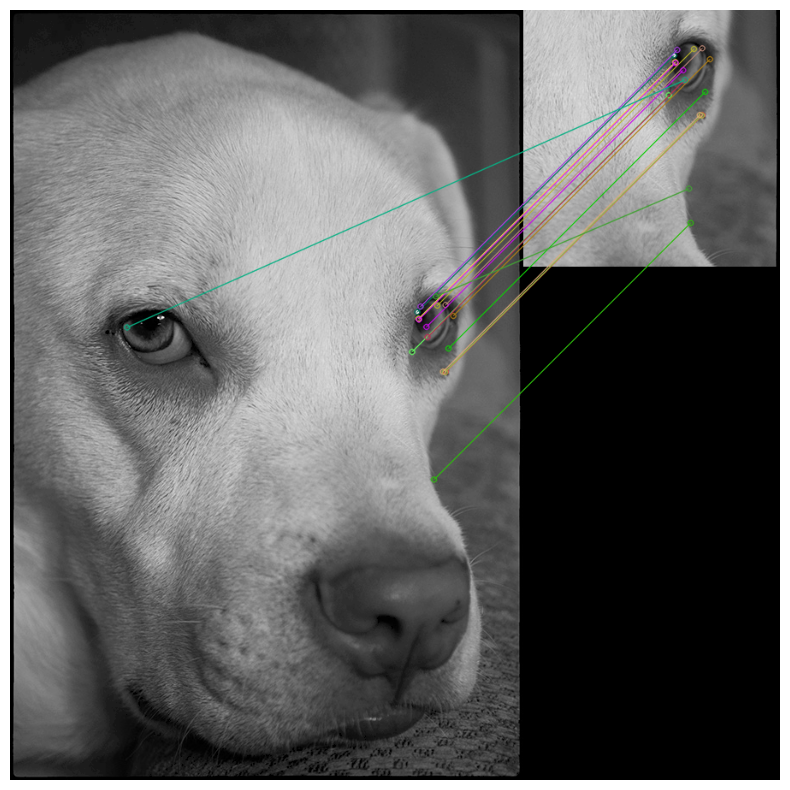

In [109]:
img2_crop = img2[300:600, 300:600]
cv_2_crop = cv_bf_matcher(img2, img2_crop)
show(cv_2_crop)

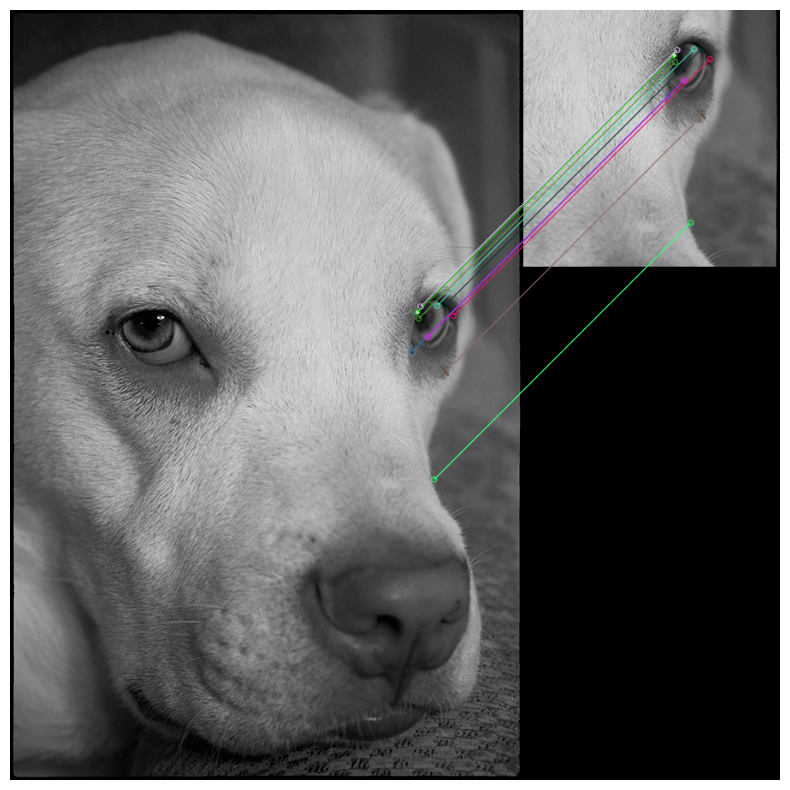

In [110]:
custom_2_crop = custom_matcher(img2, img2_crop)
show(custom_2_crop)

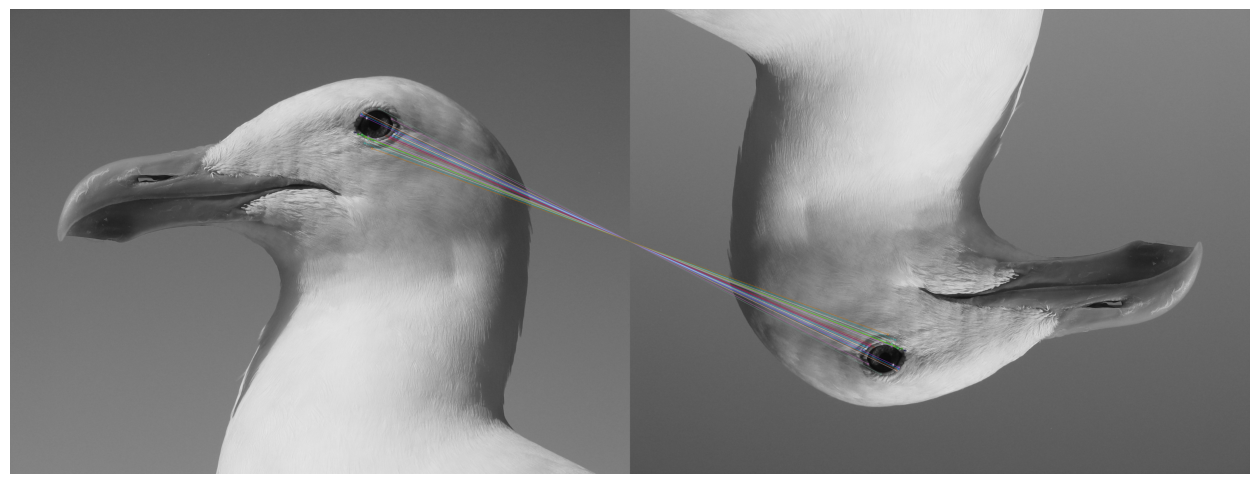

In [111]:
img3 = cv2.imread("./images/bird.jpg", cv2.IMREAD_GRAYSCALE)
img3_rotate = cv2.rotate(img3, cv2.ROTATE_180)

cv_3 = cv_bf_matcher(img3, img3_rotate)
show(cv_3)

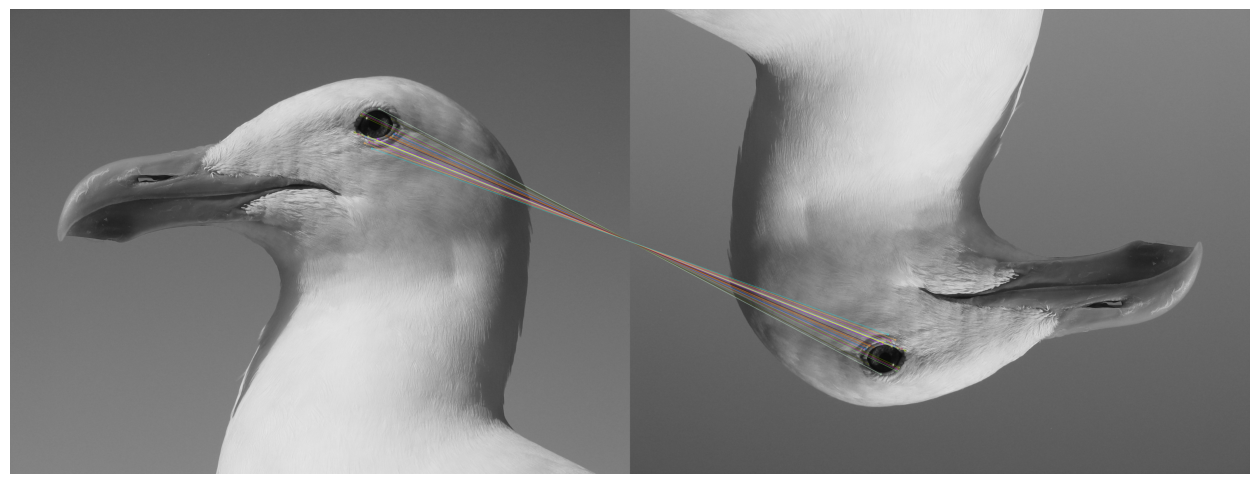

In [112]:
custom_3 = custom_matcher(img3, img3_rotate)
show(custom_3)

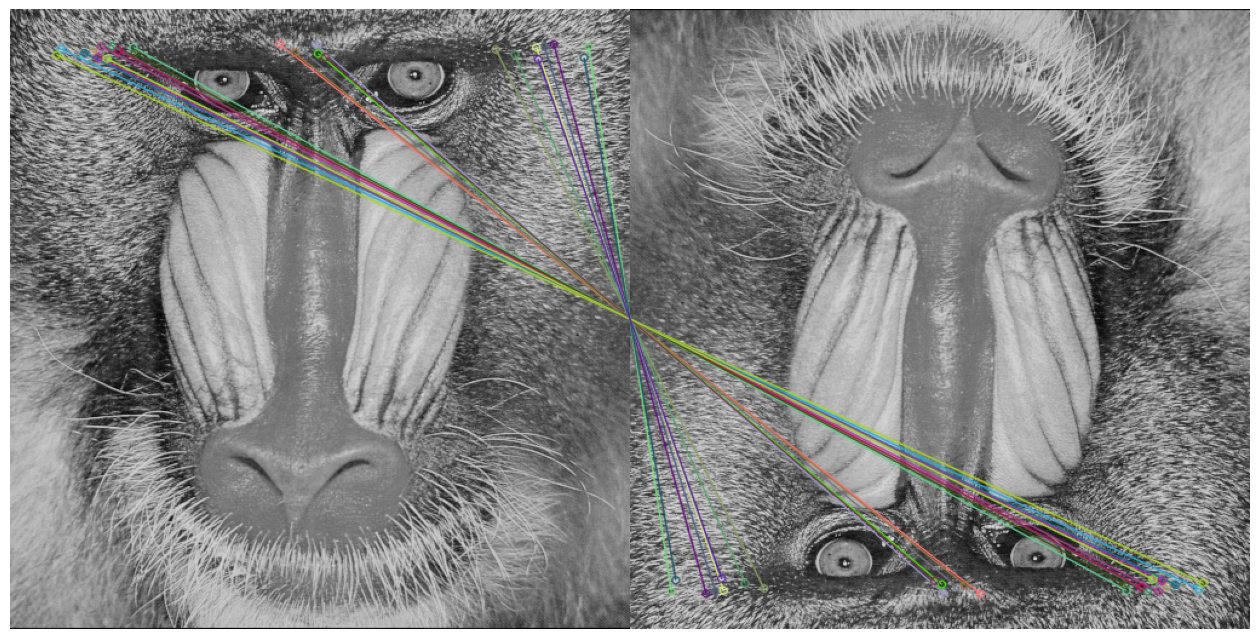

In [113]:
img4 = cv2.imread("./images/monkey.png", cv2.IMREAD_GRAYSCALE)
img4_rotate = cv2.rotate(img4, cv2.ROTATE_180)

cv_4 = cv_bf_matcher(img4, img4_rotate)
show(cv_4)

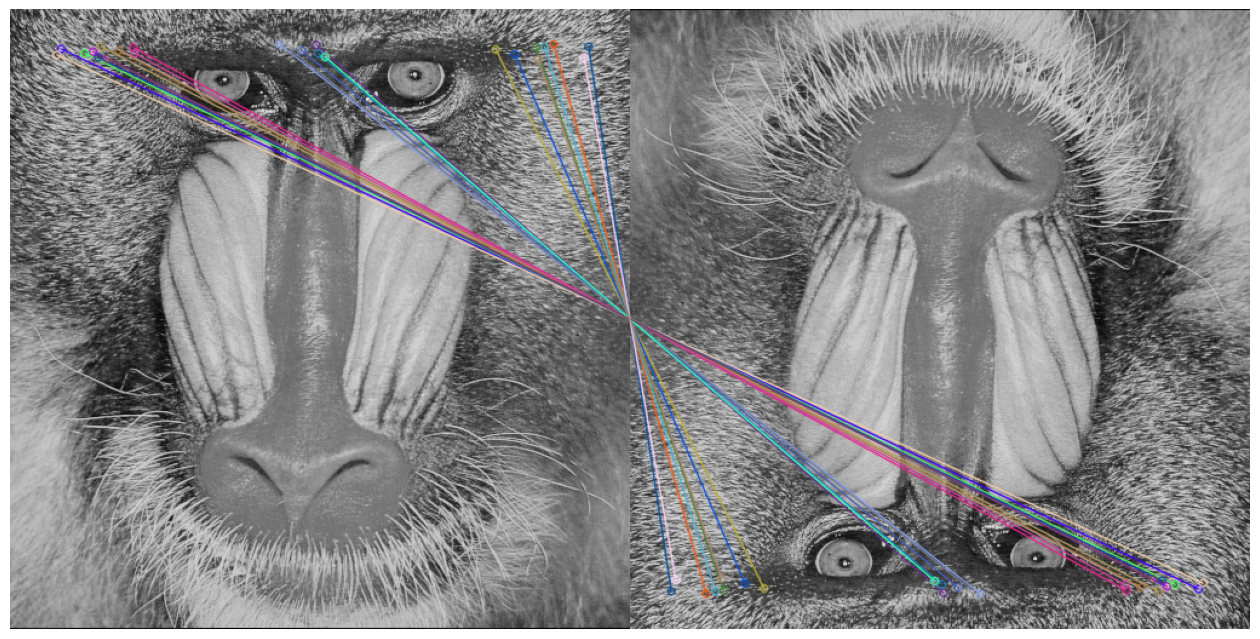

In [114]:
custom_4 = custom_matcher(img4, img4_rotate)
show(custom_4)